In [62]:
%matplotlib inline
%pylab inline
import numpy
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display, clear_output

Populating the interactive namespace from numpy and matplotlib


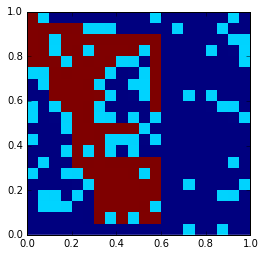

103


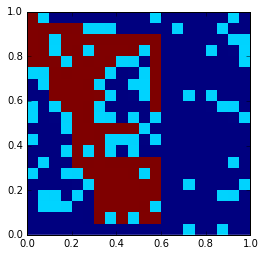

In [66]:
# Size of the area
n_row = 20
n_col = 20

# Where is the person's initial position?
start = numpy.array([0,0])

# Where is the goal?
goal = numpy.array([n_row-1, n_col-1-8])

# The rate of walls over the area
wall_rate = 0.2

# Initialize the area with "0"
area = numpy.zeros((n_row, n_col))

# Here it generates walls that the person can not pass.
# The walls are denoted by "1", and put randomly on "wall_selected".
# The number of walls depends on the "wall_rate"
wall_base = numpy.random.rand(n_row, n_col)
condlist = [wall_base <=wall_rate, wall_base>wall_rate]
choicelist = [1, 0]
wall_selected = numpy.select(condlist,choicelist)
area = wall_selected

# Present position is initialized by "start".
present = start

# Each point on the area is initialized with n_row * n_col (sufficiently large value).
# "scores" is the numpy matrix that stores the scores.
scores = n_row * n_col * numpy.ones((n_row, n_col))

# We know the score at the start point
scores[present[0],present[1]] = numpy.sum(numpy.absolute(goal-present))

# Visitied positions (large_value(n_row*n_col): visited, 1: non-visited)
visited = numpy.ones((n_row, n_col))

n_iteration = 0

f, ax = plt.subplots()

# A-star algorithm starts here.
while any(present != goal):
    
    n_iteration = n_iteration +1
    
    #Select not-visited position where the score is the smallest
    # This is judged by matrices of scores and visited
    min_pos = numpy.zeros(2)
    weighted_scores = scores * visited
    min_index = numpy.argmin(weighted_scores)
    min_pos[0] = int(min_index // n_col)
    min_pos[1] = int(min_index % n_col)
    min_value = scores[min_pos[0],min_pos[1]]
    
    # The position gets visited.
    visited[min_pos[0],min_pos[1]] = n_col * n_row
    next = numpy.zeros(2)
    
    # Update present position on the area
    area[min_pos[0],min_pos[1]] = 3
    
    #draw animation
    im = plt.imshow(area,interpolation='none',extent=[0,1,0,1])
    clear_output(wait=True)
    display(f)
    
    if min_pos[0] > 0:
        next[0] = min_pos[0]-1
        next[1] = min_pos[1]
        if all(next==goal):
            break
        # When the next position is wall, put a large value for the score.
        if area[next[0],next[1]] == 1:
            temp_score = n_col * n_row * 100000
        #Otherwise calculate the score
        else:
            temp_score = min_value + 1.0+ numpy.sum(numpy.absolute(goal-next)) - numpy.sum(numpy.absolute(goal-min_pos))
        if temp_score < scores[next[0],next[1]]:
            scores[next[0],next[1]] = temp_score
            visited[next[0],next[1]] = 1
    if min_pos[0] < n_row-1:
        next[0] = min_pos[0]+1
        next[1] = min_pos[1]
        if all(next==goal):
            break
        # When the next position is wall, put a large value for the score.
        if area[next[0],next[1]] == 1:
            temp_score = n_col * n_row * 100000
        #Otherwise calculate the score
        else:
            temp_score = min_value + 1.0+ numpy.sum(numpy.absolute(goal-next)) - numpy.sum(numpy.absolute(goal-min_pos))
        if temp_score < scores[next[0],next[1]]:
            scores[next[0],next[1]] = temp_score
            visited[next[0],next[1]] = 1
    if min_pos[1] > 0:
        next[0] = min_pos[0]
        next[1] = min_pos[1] - 1
        if all(next==goal):
            break
        # When the next position is wall, put a large value for the score.
        if area[next[0],next[1]] == 1:
            temp_score = n_col * n_row * 100000
        #Otherwise calculate the score
        else:
            temp_score = min_value + 1.0+ numpy.sum(numpy.absolute(goal-next)) - numpy.sum(numpy.absolute(goal-min_pos))
        if temp_score < scores[next[0],next[1]]:
            scores[next[0],next[1]] = temp_score
            visited[next[0],next[1]] = 1
    if min_pos[1] < n_col-1:
        next[0] = min_pos[0]
        next[1] = min_pos[1] + 1
        if all(next==goal):
            break
        # When the next position is wall, put a large value for the score.
        if area[next[0],next[1]] == 1:
            temp_score = n_col * n_row * 100000
        #Otherwise calculate the score
        else:
            temp_score = min_value + 1.0+ numpy.sum(numpy.absolute(goal-next)) - numpy.sum(numpy.absolute(goal-min_pos))
        if temp_score < scores[next[0],next[1]]:
            scores[next[0],next[1]] = temp_score
            visited[next[0],next[1]] = 1
    
    if numpy.min(scores*visited) >= n_col * n_row:
        print "fail at ",
        print n_iteration
        break
        
print n_iteration

Are you sure you want to run A\* algorithm with the above map?